# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$.

In [ ]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.

    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy.
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.

    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    cur = x0 - f(x0)/fder(x0)
    prev = x0

    for _ in range(maxiter):
        if(abs(cur-prev)<=eps):
            break
        prev = cur
        cur = cur - f(cur)/fder(cur)

    return cur

### Test I.1

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [ ]:
p = lambda x: x**2 - 1
Dp = lambda x: 2*x
approx = newton_iteration(p,Dp,1,1e-10,10)
approx

1.0

### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [ ]:
def el_newton(f, Df, x0, m=1, eps=1e-5, maxiter=1000):
    xn = x0
    for n in range(0,maxiter):
        fxn = f(xn)
        if abs(fxn) < eps:
            print('Found solution after',n,'iterations.')
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - (m*(fxn/Dfxn))
    print('Exceeded maximum iterations. No solution found.')
    return None

In [ ]:
p = lambda x: (x-1)**2*(x+1)**2
Dp = lambda x: 4*(x-1)*(x+1)*x
approx = el_newton(p,Dp,1,1e-10,10,1)
print(approx)

Found solution after 0 iterations.
1


# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  import sys


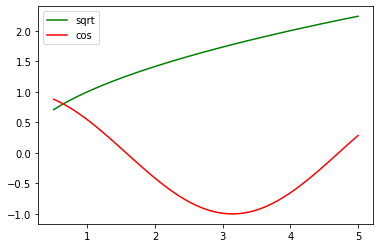

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0.5, 5, 50)

plt.plot(x, np.sqrt(x), color = "green")
plt.plot(x, np.cos(x), color = "red")
plt.legend([1, 2], labels=["sqrt", "cos"])


plt.show()

Vemos que la solucion esta en $[0.5,1]$ entonces, $f(x) = \sqrt(x)-cos(x)$m luego $f'(x)= \frac{1}{2\cdot \sqrt(x)}+sen(x)$, por lo tanto, $m = 1$ y $M = 2$

In [ ]:
def f_p_sol(eps = 1e-5, alpha = 1):

    prev = 1.5/2
    cur = prev - alpha*(np.sqrt(prev) - np.cos(prev))
    eps1 = abs(cur - prev)*10
    num = 1

    while abs(cur - prev)>0.25*eps and cur>0:
        prev = cur
        cur = cur - alpha*(np.sqrt(cur) - np.cos(cur))
        num+=1

    return cur, num

In [ ]:
for i in [0.1, 0.5, 1.0, 2.0]:
    print(i, f_p_sol(alpha = i))
f_p_sol(alpha = 2.0/3)

0.1 (0.6417314556204897, 67)
0.5 (0.6417156095558334, 12)
1.0 (0.6417142154160496, 9)
2.0 (-0.11760568315221742, 5)


(0.6417145071423276, 8)

# Part III. Newton's fractal.

(Not graded).

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points.
Color the grid in three colors, according to the root, to which iterations converged.

In [ ]:
import cmath

def newt_frac(x0):

    eps=1e-5
    maxiter=1000
    cur = x0 - (x0**3-1)/3*x0**2
    prev = x0

    for _ in range(maxiter):
        if(abs(cur-prev)<=eps):
            break
        if(abs(cur-prev)>1e2):
            return 0
        prev = cur
        cur = cur - (cur**3-1)/3*cur**2

    if abs(cur-cmath.exp(complex(0,2*np.pi*1/3)))<abs(cur-cmath.exp(complex(0,2*np.pi*2/3))):
        return 1
    else :
        return 2

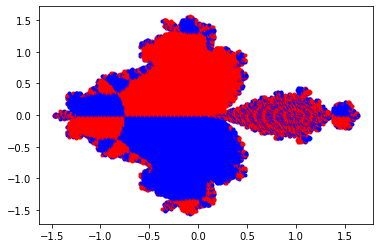

In [ ]:
x = np.linspace(-2, 2, 300)
y = np.linspace(-2, 2, 300)

for x0 in x:
    for y0 in y:
        fr = newt_frac(complex(x0,y0))
        if fr==1:
            plt.plot(x0, y0, marker='o', markersize=3, color='red')
        elif fr==2:
            plt.plot(x0, y0, marker='o', markersize=3, color='blue')

roots_x = []
roots_y = []
for i in range(3):
    z = cmath.exp(complex(0,2*np.pi*i/3))
    roots_x.append(z.real)
    roots_y.append(z.imag)

plt.scatter(roots_x, roots_y, c='g')
plt.show()